In [1]:
import os

In [5]:
directory = "C:\\Users\\agamm\\Desktop\\Deep Learning Act\\cell_images"

In [6]:
os.listdir(directory)

['test', 'train']

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from matplotlib.image import imread

In [11]:
train_path = directory + "\\train\\"
test_path = directory + "\\test\\"

In [14]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [15]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [17]:
os.listdir(train_path + 'parasitized')[12]

'C100P61ThinF_IMG_20150918_144348_cell_140.png'

In [34]:
one_cell = train_path + 'parasitized\\' + 'C100P61ThinF_IMG_20150918_144104_cell_165.png'

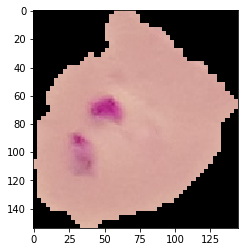

In [36]:
plt.imshow(imread(one_cell))

In [40]:
imread(one_cell).shape

(154, 145, 3)

In [42]:
os.listdir(train_path + 'uninfected\\')

['C100P61ThinF_IMG_20150918_144104_cell_128.png',
 'C100P61ThinF_IMG_20150918_144104_cell_131.png',
 'C100P61ThinF_IMG_20150918_144104_cell_144.png',
 'C100P61ThinF_IMG_20150918_144104_cell_21.png',
 'C100P61ThinF_IMG_20150918_144104_cell_25.png',
 'C100P61ThinF_IMG_20150918_144104_cell_48.png',
 'C100P61ThinF_IMG_20150918_144104_cell_65.png',
 'C100P61ThinF_IMG_20150918_144348_cell_120.png',
 'C100P61ThinF_IMG_20150918_144348_cell_125.png',
 'C100P61ThinF_IMG_20150918_144348_cell_131.png',
 'C100P61ThinF_IMG_20150918_144348_cell_2.png',
 'C100P61ThinF_IMG_20150918_144348_cell_25.png',
 'C100P61ThinF_IMG_20150918_144348_cell_40.png',
 'C100P61ThinF_IMG_20150918_144348_cell_71.png',
 'C100P61ThinF_IMG_20150918_144823_cell_126.png',
 'C100P61ThinF_IMG_20150918_144823_cell_127.png',
 'C100P61ThinF_IMG_20150918_144823_cell_139.png',
 'C100P61ThinF_IMG_20150918_144823_cell_142.png',
 'C100P61ThinF_IMG_20150918_144823_cell_151.png',
 'C100P61ThinF_IMG_20150918_144823_cell_21.png',
 'C100P61T

In [43]:
nd_cell = train_path + 'uninfected\\' + 'C100P61ThinF_IMG_20150918_144104_cell_21.png'

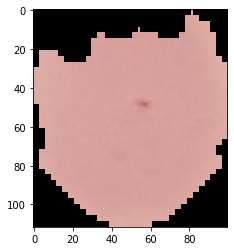

In [44]:
plt.imshow(imread(nd_cell))

In [45]:
imread(nd_cell).shape

(112, 100, 3)

In [47]:
# pwd

In [49]:
len(os.listdir(train_path + 'parasitized'))

12480

In [52]:
len(os.listdir(test_path + 'parasitized'))

1300

In [53]:
# Different Dimensions in images

In [54]:
dim1 = []
dim2 = []

for img_filename in os.listdir(test_path + 'uninfected\\'):
    img = imread(test_path + 'uninfected\\' + img_filename)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

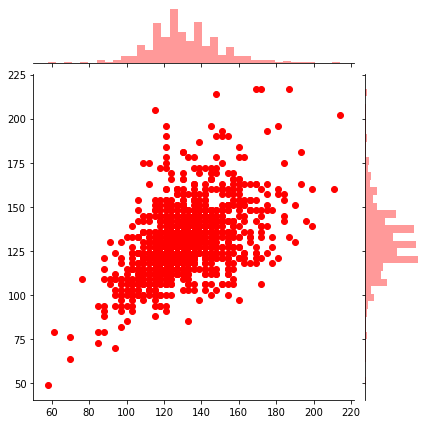

In [66]:
sns.jointplot(dim1, dim2, color='r')

In [61]:
np.mean(dim1)

130.92538461538462

In [62]:
np.mean(dim2)

130.75

In [101]:
image_shape = (130, 130, 3)

In [68]:
28*28
# MNIST

784

In [69]:
32*32*3
# CIFAR

3072

In [70]:
130*130*3

50700

In [71]:
# Batches will be used since data is huge  |   The data will be looped over (in batches).


In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [74]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [76]:
imread(one_cell).max()

0.90588236

In [77]:
img_gen = ImageDataGenerator(rotation_range=20,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode='nearest')

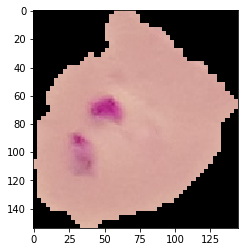

In [79]:
plt.imshow(imread(one_cell))

In [80]:
one_cell_r = imread(one_cell)

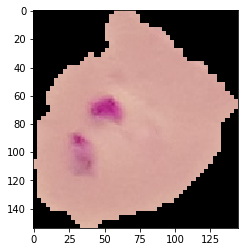

In [81]:
plt.imshow(one_cell_r)

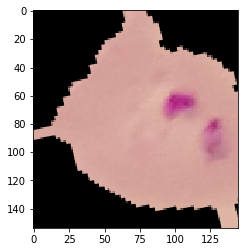

In [94]:
plt.imshow(img_gen.random_transform(one_cell_r))

In [86]:
# Data can be augmented, artificially expanded and double the size

In [95]:
img_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [96]:
img_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [97]:
# for .flow_from_directory, data must be orginized in the number of folders as the number of classes
# Ex: dog, cat, and bird classes and each needs to have a folder for itself

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [133]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [134]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
__________

In [135]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [136]:
batch_size=16

In [137]:
train_image_gen = img_gen.flow_from_directory(train_path, target_size=image_shape[:2], color_mode='rgb',
                                              batch_size=batch_size,
                                             class_mode='binary')

Found 24958 images belonging to 2 classes.


In [138]:
test_image_gen = img_gen.flow_from_directory(test_path, target_size=image_shape[:2], color_mode='rgb',
                                              batch_size=batch_size,
                                             class_mode='binary',
                                            shuffle=False)

Found 2600 images belonging to 2 classes.


In [139]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [145]:
results = model.fit_generator(train_image_gen, epochs=1, validation_data=test_image_gen, callbacks=[early_stop])

1560/1560 [==============================] - 417s 267ms/step - loss: 8.0125 - acc: 0.5018 - val_loss: 8.0838 - val_acc: 0.5000


In [146]:
from tensorflow.keras.models import load_model

In [150]:
model.save('malaria.h5')

In [151]:
losses

,loss,acc,val_loss,val_acc
0,8.012628,0.501763,8.083769,0.5


In [152]:
losses = pd.DataFrame(model.history.history)

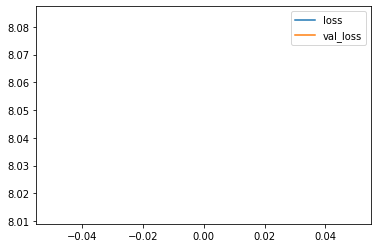

In [156]:
losses[['loss', 'val_loss']].plot()

In [157]:
model.evaluate_generator(test_image_gen)

[8.083768753879447, 0.5]

In [158]:
from tensorflow.keras.preprocessing import image

In [159]:
predictions = model.predict_generator(test_image_gen)

In [160]:
predictions

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [161]:
prediction = predictions > 0.5

In [162]:
prediction

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [163]:
from sklearn.metrics import classification_report, confusion_matrix

In [165]:
print(classification_report(prediction, test_image_gen.classes))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67      2600
           1       0.00      0.00      0.00         0

    accuracy                           0.50      2600
   macro avg       0.50      0.25      0.33      2600
weighted avg       1.00      0.50      0.67      2600



C:\Users\agamm\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [170]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [171]:
confusion_matrix(test_image_gen.classes, prediction)

array([[1300,    0],
       [1300,    0]], dtype=int64)

In [181]:
from tensorflow.keras.preprocessing import image

In [182]:
my_image = image.load_img(one_cell, target_size=image_shape)

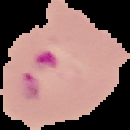

In [183]:
my_image

In [186]:
my_image = image.img_to_array(my_image)

In [191]:
my_image.shape

(130, 130, 3)

In [192]:
my_imge_arr = np.expand_dims(my_image, axis=0)

In [193]:
my_imge_arr.shape

(1, 130, 130, 3)

In [194]:
model.predict(my_imge_arr)

array([[0.]], dtype=float32)

In [195]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}